In [1]:
import tensorcircuit as tc
import numpy as np
import scipy
import tensorflow as tf
from matplotlib import pyplot as plt
from scipy.linalg import expm, sinm, cosm
K=tc.set_backend("tensorflow")

2022-07-27 12:43:15.195087: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-27 12:43:15.195105: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def I(n):
    return np.array([1 if i%(n+1)==0 else 0 for i in range(n*n)]).reshape(n,n)
def ZERO(n):
    return np.array([0 for i in range(n*n)]).reshape(n,n)
def _exp(mat,t):
    return np.cos(t)*I(mat.shape[0])+1j*np.sin(t)*mat;
def conj_tr(v):
    return np.conj(v.transpose())
def expect(mat,v):
    return np.matmul(np.matmul(conj_tr(v),mat),v)[0][0]

tx=np.array([[0,1],[1,0]])
ty=np.array([[0,-1j],[1j,0]])
tz=np.array([[1.,0],[0,-1.]])
v0=np.array([[1],[0]])
v1=np.array([[0],[1]])

## 1.2 向量和矩阵

### 1.2.1 矩阵旋转

give a degree theta
2


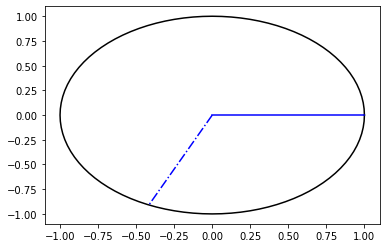

In [3]:
print('give a degree theta')
theta=float(input())
def R(x):
    return np.array([[np.cos(x),np.sin(x)],[-np.sin(x),np.cos(x)]])

def draw_circle(avg=""):
    x_arr,y_arr=[],[]
    for i in range(101):
        t=np.pi/50*i;
        x_arr.append(np.cos(t))
        y_arr.append(np.sin(t))
    plt.plot(x_arr,y_arr,avg)

def draw_line(ax,ay,bx,by,avg=""):
    x_arr,y_arr=[ax,bx],[ay,by]
    plt.plot(x_arr,y_arr,avg)

v=np.array([[1],[0]])
u=np.matmul(R(theta),v)

plt.clf()
draw_circle('k-')
draw_line(0,0,1,0,'b')
draw_line(0,0,u[0][0],u[1][0],'b-.')
plt.show()

### 1.2.2 矩阵指数

In [4]:
print(expm(1.j*tx))
print(expm(1.j*ty))
print(expm(1.j*tz))

[[0.54030231+0.j         0.        +0.84147098j]
 [0.        +0.84147098j 0.54030231+0.j        ]]
[[ 0.54030231+0.j  0.84147098+0.j]
 [-0.84147098+0.j  0.54030231+0.j]]
[[0.54030231+0.84147098j 0.        +0.j        ]
 [0.        +0.j         0.54030231-0.84147098j]]


In [5]:
def test(theta):
    print(np.allclose(expm(theta*1.j*tx),_exp(tx,theta), atol=0.0001))

In [6]:
test(1)

True


注意到任意一个泡利矩阵 $\hat{P}$ 都有性质 $P^2=\bar{P}^T=I$ 。
对 $e^{i\theta\hat{P}}$ ，我们将它泰勒展开，只会有 $I,iP$ 两项，系数分别是 $\cos(\theta)$ 和$\sin(\theta)$ 的泰勒展开，得证。

若矩阵欧拉公式 $e^{i\theta P}=\cos(\theta)I+i\sin(\theta)P$ 对任意 $\theta$ 成立，我们取 $-\theta$ 可以得到$e^{-i\theta P}=\cos(\theta)I-i\sin(\theta)P$

故 $I=e^{i\theta P}\times e^{-i\theta P}=\cos^2(\theta)I^2-i^2\sin^2(\theta)P^2=\cos^2(\theta)I+\sin^2(\theta)P^2$

比较各元素可知 $P^2=I$ ，由上述证明易知这样的 $P$ 满足公式。

故 $P$ 满足该公式当且仅当 $P^2=I$ 

### 1.2.3 矩阵关于向量的期望

In [7]:
Pauli=[np.array([[1,0],[0,1]]),tc.gates._x_matrix,tc.gates._y_matrix,tc.gates._z_matrix]
def expectation(p,q,theta):
    P=Pauli[p]
    Q=Pauli[q]
    v=expm(1.j*theta/2*P)*np.matrix([1,0]).transpose()
    return (v.conj().transpose()@Q@v)[0,0]

In [8]:
expectation(2,3,3)

(-0.9899924966004452+0j)

/home/tencent_go/anaconda3/envs/tc/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


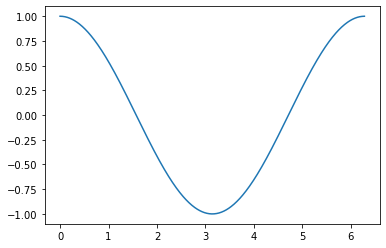

In [9]:
plt.clf()
x = np.arange(0, 2 * np.pi, 0.01)
plt.plot(x, [expectation(1,3, t) for t in x])
plt.show()

### 1.2.4 张量积

In [10]:
n=int(input())
H = np.zeros((2**n, 2**n))
for i in range(n):
    H += np.kron(np.kron(I(2**i),tz),I(2**(n-i-1)))
for i in range(n-1):
    H += np.kron(np.kron(I(2**i),tx),I(2**(n-i-1)))*np.kron(np.kron(I(2**(i+1)),tx),I(2**(n-i-2)))
print(H)
print(H[0,0])

3
[[ 3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -3.]]
3.0


### 1.2.5 狄拉克符号

In [11]:
def multi_kron(arr):
    ans=I(1)
    for i in arr:
        ans=np.kron(ans,i)
    return ans
print(1/np.sqrt(2)*(multi_kron([v0,v1,v0])-multi_kron([v1,v0,v1])))

[[ 0.        ]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]]


## 1.3 导数与梯度下降

### 1.3.1 数值微分

In [12]:
def number_differential(f,x,delta):
    return (f(x+delta)-f(x))/delta

# sample
print(number_differential(np.sin,1,1e-6),np.cos(1),number_differential(np.sin,1,1e-6)-np.cos(1))

0.5403018851213304 0.5403023058681398 -4.2074680939307996e-07


### 1.3.2 三角函数数值微分

$$
\begin{align}
f'(x)=&A\cos(x+B)=\dfrac{A\sin(x+\delta+B)-A\sin(x-\delta+B)}\tau\\
=&\dfrac{2A\cos (x+B)\sin \delta}\tau\Rightarrow\\
\tau=&2\sin\delta\\
f'(x)=&\dfrac{A\sin(x+\delta+B)-A\sin(x-\delta+B)}{2\sin\delta}=\dfrac{f(x+\delta)-f(x-\delta)}{2\sin\delta}\\
\end{align}
$$

In [13]:
def sin_differential(x,A,B,delta=1):
    t=np.sin(delta)*2
    return (A*np.cos(x+B),(A*np.sin(x+delta+B)-A*np.sin(x-delta+B))/t)

# sample
print(sin_differential(1,2,3))

(-1.3072872417272239, -1.3072872417272239)


### 1.3.3 单比特参数平移

不难发现，$f=A\sin(x+B)$，其中$A=\{0,1\}$，所以：

$$
f'(x)=\dfrac{f(x+1)-f(x-1)}{2\sin 1}
$$

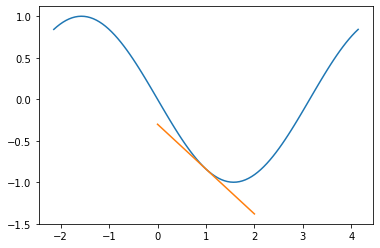

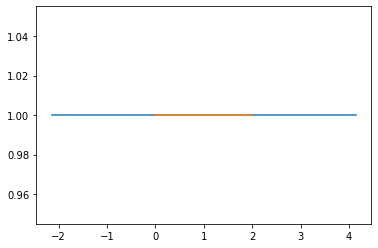

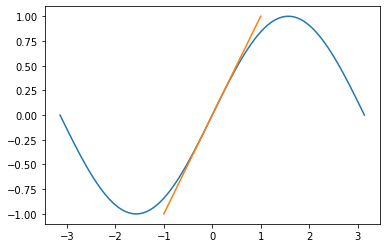

In [14]:
def f(id1,id2):
    Mat=[I(2),tx,ty,tz]
    class test_1_helper:
        def __init__(self,p,q):
            self.P=p
            self.Q=q
        def __call__(self,t):
            vt=np.matmul(_exp(self.P,t/2),v0)
            return expect(self.Q,vt).real
    return test_1_helper(Mat[id1],Mat[id2])

def draw_function(f,s,t,point_num,avg=""):
    x_arr,y_arr=[],[]
    for i in range(point_num+1):
        v=s+(t-s)*1./point_num*i;
        x_arr.append(v)
        y_arr.append(f(v))
    plt.plot(x_arr,y_arr)

def f_differential(id1,id2,x):
    t=np.sin(1)*2
    F=f(id1,id2)
    return (F(x+1)-F(x-1))/t

def check(id1,id2,x):
    F=f(id1,id2)
    y=F(x)
    dy=f_differential(id1,id2,x)
    plt.clf()
    draw_function(F,x-np.pi,x+np.pi,100)
    draw_line(x-1,y-dy,x+1,y+dy)
    plt.show()

# sample
check(2,1,1)
check(2,0,1)
check(1,2,0)

### 1.3.4 梯度下降

In [15]:
def expectation_of_matrix(a0,a1,theta):
    P=Pauli[a0]
    Q=Pauli[a1]
    v_theta=np.matmul(expm(0.5*1j*theta*P),v0)
    intermediate=np.matmul(Q,v_theta)
    return np.matmul(np.transpose(v_theta).conj(),intermediate)

def differential_z_1(f,x,y,z):
    delta=np.pi/6
    diff1=f(x,y,z+delta)-f(x,y,z-delta)
    return diff1


def found_min_f(step,x_0,g):
    f_min=g(1,2,x_0)
    diff=differential_z_1(g,1,2,x_0)
    while abs(diff)>=0.001:
        f_temp=g(1,2,x_0-step*diff)
        if f_temp<f_min:
            x_0=x_0-step*diff
            f_min=f_temp
        else:
            step=step/2
        diff=differential_z_1(g,1,2,x_0)
    return f_min,x_0

f_min,x_0=found_min_f(0.1,0.25*np.pi,expectation_of_matrix)
print(f_min,x_0)

[[-0.99999955+0.j]] [[-1.56984791+0.j]]


### 1.3.5 回到线路

In [16]:
tc.set_dtype("complex64")
K=tc.set_backend("tensorflow")

def expectation_of_matrix_1(a0,a1,theta):
    P=Pauli[a0]
    P=tc.array_to_tensor(P)
    Q=Pauli[a1]
    Q=tc.array_to_tensor(Q)
    v_theta=tc.backend.expm(0.5*1j*theta*P)@v0
    intermediate=Q@v_theta
    return K.real((K.transpose(K.conj(v_theta))@intermediate)[0][0])

def found_min_f_1(step,x_0,g):
    f_min=g(1,2,x_0)
    diff=K.grad(g,argnums=2)(1,2,x_0)
    while abs(diff)>=1e-2:
        f_temp=g(1,2,x_0-step*diff)
        if f_temp<f_min:
            x_0=x_0-step*diff
            f_min=f_temp
        else:
            step=step/2
        diff=K.grad(g,argnums=2)(1,2,x_0)
    return f_min,x_0
    
f_min,x_0=found_min_f_1(0.1,tc.array_to_tensor(0.25*np.pi),expectation_of_matrix_1)
print(f_min,x_0)

2022-07-27 12:43:28.669640: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-27 12:43:28.669657: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-27 12:43:28.669666: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (imasonliu-LC13): /proc/driver/nvidia/version does not exist
2022-07-27 12:43:28.669887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tf.Tensor(-0.9999535, shape=(), dtype=float32) tf.Tensor((-1.5611656+0j), shape=(), dtype=complex64)


## 1.4 量子线路

### 1.4.1 态生成

In [17]:
def n_qbit_circuit1(n):
    c=tc.Circuit(n)
    c.h(0)
    for i in range(1,n):
        c.cnot(0,i)
    print(c.state())
    print(c.draw())

def n_qbit_circuit2(n):
    c=tc.Circuit(n)
    for i in range(n):
        c.h(i)
    print(c.state())
    print(c.draw())

n_qbit_circuit1(2)
n_qbit_circuit2(2)

def given_transpose():
    c=tc.Circuit(3)
    c.ANY(0,unitary=tc.array_to_tensor([[0,1],[1,0]]),name="U1")
    c.ANY(1,unitary=tc.array_to_tensor([[1,0],[0,-1]]),name="U2")
    c.cswap(2,0,1)
    print(c.state())
    print(c.draw())

given_transpose()

tf.Tensor([0.70710677+0.j 0.        +0.j 0.        +0.j 0.70710677+0.j], shape=(4,), dtype=complex64)
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
tf.Tensor([0.49999997+0.j 0.49999997+0.j 0.49999997+0.j 0.49999997+0.j], shape=(4,), dtype=complex64)
     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘
tf.Tensor([0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j], shape=(8,), dtype=complex64)
     ┌────┐   
q_0: ┤ U1 ├─X─
     ├────┤ │ 
q_1: ┤ U2 ├─X─
     └────┘ │ 
q_2: ───────■─
              


对第一个量子线路，考虑将第一个量子比特经Hadamard门转换为 $|0\rangle+|1\rangle$,再用CNOT门将其余量子比特进行控制

对第二个量子线路，每个量子比特经Hadamard门转换为 $|0\rangle+|1\rangle$，即得到结果

 对第三个量子线路，引入辅助量子比特，用辅助量子比特与CSWAP门使得经U1与U2变换的量子态形成叠加

### 1.4.2 多比特下的参数平移

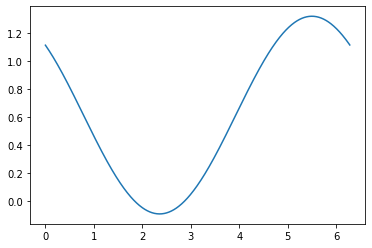

tf.Tensor(
[[-0.35355332 -0.6123723 ]
 [-0.7071066  -0.7071067 ]], shape=(2, 2), dtype=float32)
tf.Tensor(-0.7071066, shape=(), dtype=float32)


In [18]:
def exp_sumz(n,nlayers,param):
    c=tc.Circuit(n)
    for j in range(nlayers):
        for i in range(n):
            c.rx(i,theta=param[i][j])
        for i in range(n-1):
            c.cnot(i,i+1)
    return K.real(K.sum([c.expectation_ps(z=[i]) for i in range(n)]))

X=np.arange(0,2*np.pi,0.01)
plt.plot(X,[exp_sumz(2,2,[[np.pi/6,np.pi/4],[np.pi/4,x]]) for x in X])
plt.show()
print(K.grad(exp_sumz, argnums=2)(2,2,K.convert_to_tensor([[np.pi/6,np.pi/4],[np.pi/4,np.pi/4]])))

print(exp_sumz(2,2,[[np.pi/6,np.pi/4],[np.pi/4,np.pi/4+np.pi/6]])-
      exp_sumz(2,2,[[np.pi/6,np.pi/4],[np.pi/4,np.pi/4-np.pi/6]]))

验证参数平移在多个参数时是否仍然成立

### 1.4.3 量子门分解

#### 用 CNOT 门实现 SWAP 门

如果已知可以不用辅助位只用控制非门实现交换门，那么可以做如下考量：线路上仅能执行两种控制非门，而连续执行两个相同的控制非门没有任何意义，所以相邻两个控制非门的控制位与目标位一定分别不同。又两位地位相同，因而可以模拟单一过程直到发现执行了交换门，并发现为 3 次。

实际上 OI 中存在一种交换两数 `std::enable_if_t<std::is_unsigned_v<T>, T> a, b;` 的方法 `a ^= b ^= a ^= b`，分解到每一位上实际上就是这个过程（控制非门对应于异或赋值）。

```python
c = tc.Circuit(2)

c.cnot(0, 1)
c.cnot(1, 0)
c.cnot(0, 1)

d = tc.Circuit(2)
d.swap(0, 1)

print(np.allclose(c.matrix(), d.matrix()))
c.draw(output='mpl')
```

![](./swap_by_cnot.png)

#### 用 CNOT 门和 Rz 门实现 Rzz 门

$$
\begin{aligned}
R_z(\theta)&=\exp\left(-i\theta/2\hat Z\right).\\
R_{zz}(\theta)&=\exp\left(-i\theta/2\hat Z\otimes\hat Z\right).
\end{aligned}
$$

简单计算知

$$
\hat Z\otimes\hat Z=\begin{pmatrix}
1&0&0&0\\
0&-1&0&0\\
0&0&-1&0\\
0&0&0&1
\end{pmatrix}.
$$

感性理解，$|00\rangle,|11\rangle$ 对应一位的 $|0\rangle$，$|01\rangle,|10\rangle$ 对应 $|1\rangle$，这可以通过控制非做到。

```python
c = tc.Circuit(2)

theta = float(input())

c.cnot(0, 1)
c.rz(1, theta = theta)
c.cnot(0, 1)
c.cnot(1, 0)
c.rz(0, theta = theta)
c.cnot(1, 0)

d = tc.Circuit(2)
d.rzz(0, 1, theta=theta)

print(np.allclose(c.matrix(), d.matrix()))
c.draw(output='mpl')
```

![](./rzz_by_cnot_rz.png)

容易计算验证。

### 1.4.4 线路解释

考虑以下代码

实现的线路及测量的得到的结果。


In [19]:
def hmtest(s, u):
    np.testing.assert_allclose(
        np.conj(u) @ np.transpose(u), np.eye(u.shape[-1]), atol=1e-6
    )
    input_state = np.kron(np.array([1, 0]), s)
    n = int(np.log(s.shape[-1]) / np.log(2))
    c = tc.Circuit(n + 1, inputs=input_state)
    c.H(0)
    c.multicontrol(*range(n + 1), ctrl=[1], unitary=u)
    c.H(0)
    return c.expectation_ps(z=[0])


hmtest(
    np.array([1.0, 0, 0, 0]),
    np.kron(np.array([[1.0, 0], [0, -1]]), np.array([[1.0, 0], [0, -1]])),
)

<tf.Tensor: shape=(), dtype=complex64, numpy=(0.9999999+0j)>

考虑以下代码实现的线路及测量的得到的结果。

```python
def hmtest(s, u):
    np.testing.assert_allclose(
        np.conj(u) @ np.transpose(u), np.eye(u.shape[-1]), atol=1e-6
    )
    input_state = np.kron(np.array([1, 0]), s)
    n = int(np.log(s.shape[-1]) / np.log(2))
    c = tc.Circuit(n + 1, inputs=input_state)
    c.H(0)
    c.multicontrol(*range(n + 1), ctrl=[1], unitary=u)
    c.H(0)
    return c.expectation_ps(z=[0])


hmtest(
    np.array([1.0, 0, 0, 0]),
    np.kron(np.array([[1.0, 0], [0, -1]]), np.array([[1.0, 0], [0, -1]])),
)
```

理解线路图，其实际上计算的是 $v^{\mathsf T}\hat Zv$，其中

$$
v=\frac12
\begin{pmatrix}
I&I\\
I&-I\\
\end{pmatrix}
\begin{pmatrix}
I&0\\
0&U\\
\end{pmatrix}
\begin{pmatrix}
I&I\\
I&-I\\
\end{pmatrix}
\begin{pmatrix}
S\\
0
\end{pmatrix}=\frac12
\begin{pmatrix}
S+US\\
S-US
\end{pmatrix}.
$$

即测量 $\hat Z$ 关于 $\displaystyle\frac12
\begin{pmatrix}
S+US\\
S-US
\end{pmatrix}$ 的期望。

## 1.5 量子算法

### 1.5.1 问题oracle
需要实现`oracle(c,Measure)`，其中`c`为待接入的量子电路，`Measure`为`False`时为将满足条件的状态取反，为`True`时为找到满足条件的概率。

In [20]:
def oracle1(c,Measure):
    for i in range(1,6): c.CNOT(0,i)
    c.multicontrol(1,2,3,4,5,6,ctrl=[1,0,1,0,1],unitary=tc.gates.x())
    if Measure:
        return c.measure(6, with_prob = True)[0][0]
    c.z(6)
    c.multicontrol(1,2,3,4,5,6,ctrl=[1,0,1,0,1],unitary=tc.gates.x())
    for i in range(1,6): c.CNOT(0,i)

### 1.5.2 Grover算法实现

In [21]:
def reflection(n,c):
    for i in range(n):
        c.H(i)
        c.X(i)
    c.multicontrol(*range(n), unitary=tc.gates.z(), ctrl=[1 for _ in range(n - 1)])
    for i in range(n):
        c.X(i)
        c.H(i)
    return c

def grover1(n,m,oracle):
    def grover1_unit(n,m,oracle,iterations):
        c=tc.Circuit(n+m)
        for i in range(n):
            c.H(i)
        for i in range(iterations):
            oracle(c,False)
            reflection(n,c)
        return c.measure(*range(n), with_prob = True)
    
    mx,mul,run_time=1,1.2,0
    while True:
        run_time+=1
#        q=grover_unit(n,m,oracle,randint(0,int(mx)))[0]
        q=grover1_unit(n,m,oracle,int(2**(n/2)*np.pi/4))[0]
        c=tc.Circuit(n+m)
        for i in range(n):
            if(q[i]>0.5): c.X(i)
        if(oracle(c,True)>0.5):
            print(q)
            print(run_time)
            return
        mx=min(mx*mul,2**(n/2))

grover1(6,2,oracle1)

tf.Tensor([1. 0. 1. 0. 1. 0.], shape=(6,), dtype=float32)
1


### 1.5.3 未知解个数的Grover算法实现

如果有$t$个答案，一共有$N=2^n$种可能的状态。

则令$\theta=\arcsin(\sqrt{\dfrac TN})$，进行$k$次oracle&reflection操作，其中$k$在$[0,m)$中随机选择，正确率为：

$$
\begin{align}
P(m)=&\dfrac1m\sum_{k=0}^{m-1}\sin^2 (2k+1)\theta\\
=&\dfrac1{2m}\sum_{k=0}^{m-1}1-\cos(4k+2)\theta\\
=&\dfrac 12-\dfrac1{2m}\dfrac{\sin(4m\theta)}{2\sin(2\theta)}
\end{align}
$$

则$m\ge \sin(2\theta)^{-1}\Rightarrow P(m)>\dfrac 14$。

取$m=\sqrt N$即可在$O(\sqrt N)$的时间复杂度内求解。

按以下步骤可以做到$O(\sqrt{\dfrac Nt})$：

1. 令$m=1,\lambda\in(1,\dfrac 43)$。
2. 执行上述步骤，如果是解，则返回。
3. 令$m\leftarrow \min(\sqrt N,\lambda m)$，重复执行2.

证明：

1. $m<\sqrt{\dfrac Nt}$时，则执行时间为$O(\sqrt{\dfrac Nt})\sum_{i\ge 0}\lambda^{-i}=O(\sqrt{\dfrac Nt})$
2. $m\ge\sqrt{\dfrac Nt}$时，执行时间为$\sum_{i\ge 0}\lambda^i(\dfrac 43)^{-i}\sqrt{\dfrac Nt}=O(\sqrt{\dfrac Nt})$

In [22]:
from random import randint

def oracle2(c,Measure):
    for i in range(1,6): c.CNOT(0,i)
    c.multicontrol(2,3,4,5,6,ctrl=[0,1,0,1],unitary=tc.gates.x())
    if Measure: return c.measure(6, with_prob = True)[0][0]
    c.z(6)
    c.multicontrol(2,3,4,5,6,ctrl=[0,1,0,1],unitary=tc.gates.x())
    for i in range(1,6): c.CNOT(0,i)

def grover2(n,m,oracle):
    def grover2_unit(n,m,oracle,iterations):
        c=tc.Circuit(n+m)
        for i in range(n):
            c.H(i)
        for i in range(iterations):
            oracle(c,False)
            reflection(n,c)
        return c.measure(*range(n), with_prob = True)
    
    mx,mul,run_time=1,1.2,0
    while True:
        run_time+=1
        q=grover2_unit(n,m,oracle,randint(0,int(mx)))[0]
#        q=grover_unit(n,m,oracle,int(2**(n/2)*np.pi/4))[0]
        c=tc.Circuit(n+m)
        for i in range(n):
            if(q[i]>0.5): c.X(i)
        if(oracle(c,True)>0.5):
            print(q)
            print(run_time)
            return
        mx=min(mx*mul,2**(n/2))
        
        
grover2(6,1,oracle2)

tf.Tensor([1. 1. 1. 0. 1. 0.], shape=(6,), dtype=float32)
6


# 2 组合优化方向

## 2.1 基础

### 2.1.1 MAX CUT暴力求解

In [23]:
edges=[]
n, m = map(int, input().split())
for _ in range(m):
    edges.append([int(i) for i in input().split()])
def MAXCUT(n,m,e):
    ans,Ans=0,0
    for i in range(1<<n):
        _ans=0
        for j in range(m):
            if ((i>>e[j][0])&1)!=((i>>e[j][1])&1):
                _ans+=1
        if _ans>ans:
            ans=_ans
            Ans=i
    return ans,[(Ans>>i)&1 for i in range(n)]

print(MAXCUT(n,m,edges))

4 3
0 1
1 2
2 3
(3, [1, 0, 1, 0])


### 2.1.2 哈密顿量生成

In [24]:
edges=[]
n, m = map(int, input().split())
for _ in range(m):
    edges.append([int(i) for i in input().split()])
def H_b(n):
    Hb = np.zeros((2**n, 2**n))
    for i in range(n):
        Hb += np.kron(np.kron(I(2**i),tx),I(2**(n-i-1)))
    return Hb
def H_c(n,edges):
    Hc = np.zeros((2**n, 2**n))
    for e in edges:
        Hc += np.kron(np.kron(I(2**e[0]),tz),I(2**(n-e[0]-1)))*np.kron(np.kron(I(2**e[1]),tz), I(2**(n-e[1]-1)))
    return Hc
print(H_b(n))
print(H_c(n,edges))

4 3
0 1
1 2
2 3
[[0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.]]
[[ 3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.

# 2.1.3 MAX CUT与矩阵本征值

我们来分析 $H_c$ 的组合意义。

$Z_i$ 是对角矩阵，对角线上的 $2^n$ 个元素其实表示了 $2^n$ 种分组方式里点 $i$ 的状态（1,-1表示两个不同的组）

于是 $Z_iZ_j$ 的对角线元素表示：在对应的分组情形下，若为1则点 $i,j$ 同组，若为-1则不同组

于是 $H_c$ 的本征值，也即它的对角线元素，就等于对应二分情况下的边数-2倍CUT值

换言之，$H_c$ 矩阵的最小本征值=边数-2倍MAX CUT值。

In [25]:
edges=[]
n, m = map(int, input().split())
for _ in range(m):
    edges.append([int(i) for i in input().split()])
t=0
Hc=H_c(n,edges)
M=MAXCUT(n,m,edges)[0]
for i in range(2**n):
    if Hc[i][i]<m-2*M:
        print('False')
    if Hc[i][i]==m-2*M:
        t=1
if t==1:
    print('True')
else:
    print('False')

4 3
0 1
1 2
2 3
True


# 2.2 QAOA实现

### 2.2.1 Tensorcircuit前向实现

In [26]:
import math
K=tc.set_backend("tensorflow")

edges = []

#n, m = map(int, input().split())
#for _ in range(m):
#    edges.append([int(i) for i in input().split()])

#p = int(input())

n,m=4,3
edges.append((0,1));
edges.append((1,2));
edges.append((2,3));
#edges.append((3,0));
p=3;

def u_beta(c, beta):
    for i in range(n):
        c.rx(i, theta = 2*beta)

def u_gamma(c, gamma):
    for e in edges:
        x, y = e
        c.rzz(x, y, theta = gamma)

betas = [ math.pi/4 for _ in range(p) ]
gammas = [ 0.6 for _ in range(p) ]

def loss_cell(params):
    betas, gammas = params[:p],params[p:]
    c = tc.Circuit(n);
    for i in range(n):
        c.h(i)
    for i in range(p):
        u_gamma(c, gammas[i])
        u_beta(c, betas[i])
    return c

def loss(params):
    c = loss_cell(params)
    Loss = K.real(0.)
    for e in edges:
        Loss += K.real(c.expectation_ps(z = [e[0], e[1]]))
    return Loss

print(loss(betas+gammas))

tf.Tensor(7.450581e-09, shape=(), dtype=float32)


### 2.2.2 TensorCircuit完整实现

In [27]:
K=tc.set_backend("tensorflow")

speed = 0.01
# speed = 0.001
gloss = K.grad(loss)
for iteration in range(1000):
    grad = gloss(K.convert_to_tensor(betas+gammas))
#    bef = loss(betas + gammas)
    if iteration % 5 == 0:
        print('On iteration', iteration, ': ', loss(betas + gammas))
    if grad == None or sum(np.abs(x) for x in grad) < 0.01:
        print("break on ",iteration)
        break
    for i in range(p):
        betas[i] -= grad[i] * speed
        gammas[i] -= grad[i + p] * speed
    speed *= 0.99
c=loss_cell(betas + gammas)

print(c.measure(*range(n),with_prob = True))

On iteration 0 :  tf.Tensor(7.450581e-09, shape=(), dtype=float32)
On iteration 5 :  tf.Tensor(-1.0616698, shape=(), dtype=float32)
On iteration 10 :  tf.Tensor(-1.9311253, shape=(), dtype=float32)
On iteration 15 :  tf.Tensor(-2.7369523, shape=(), dtype=float32)
On iteration 20 :  tf.Tensor(-2.9190664, shape=(), dtype=float32)
On iteration 25 :  tf.Tensor(-2.9482992, shape=(), dtype=float32)
On iteration 30 :  tf.Tensor(-2.9539924, shape=(), dtype=float32)
On iteration 35 :  tf.Tensor(-2.9553175, shape=(), dtype=float32)
On iteration 40 :  tf.Tensor(-2.9556715, shape=(), dtype=float32)
On iteration 45 :  tf.Tensor(-2.9557776, shape=(), dtype=float32)
On iteration 50 :  tf.Tensor(-2.955813, shape=(), dtype=float32)
On iteration 55 :  tf.Tensor(-2.9558263, shape=(), dtype=float32)
On iteration 60 :  tf.Tensor(-2.955831, shape=(), dtype=float32)
On iteration 65 :  tf.Tensor(-2.955833, shape=(), dtype=float32)
On iteration 70 :  tf.Tensor(-2.9558337, shape=(), dtype=float32)
break on  72


### 2.2.3 线路参数的性质

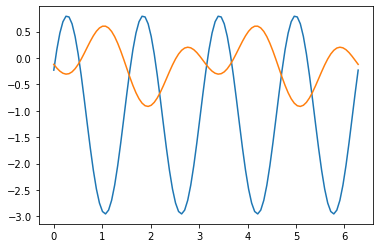

In [28]:
def loss1(a):
    betas[1]=a
    return loss(betas+gammas)

def loss2(a):
    gammas[0]=a
    return loss(betas+gammas)

def draw_function(f,s,t,point_num):
    x_arr,y_arr=[],[]
    for i in range(point_num+1):
        v=s+(t-s)*1./point_num*i;
        x_arr.append(v)
        y_arr.append(f(v))
    plt.plot(x_arr,y_arr)

draw_function(loss1,0,2*np.pi,100)
draw_function(loss2,0,2*np.pi,100)

### 2.2.4 无梯度优化实现

In [29]:
edges = []
p=5

K=tc.set_backend("numpy")

n, m = map(int, input().split())
for _ in range(m):
    edges.append([int(i) for i in input().split()])

params = [1. for _ in range(2*p)]
params=np.transpose(np.array(params))
        
def LOSS(params):
    c = LOSS_cell(params)
    Loss = K.real(0.);
    for e in edges:
        Loss += K.real(c.expectation_ps(z = [e[0], e[1]]))
    return Loss

def LOSS_cell(params):
    c = tc.Circuit(n);
    for i in range(n):
        c.h(i)
    for i in range(p):
        u_gamma(c,params[i])
        u_beta(c,params[i+p])
    return c

print(scipy.optimize.minimize(LOSS,params, method="Nelder-Mead"))

6 9
0 3
0 4
0 5
1 3
1 4
1 5
2 3
2 4
2 5
 final_simplex: (array([[1.02371407, 0.87524258, 1.16305664, 0.93698168, 1.09010784,
        1.21774102, 0.87866259, 1.07129598, 0.88058215, 1.05952745],
       [1.023719  , 0.87523311, 1.16306398, 0.93696706, 1.09009661,
        1.21771687, 0.87865701, 1.0713009 , 0.88059421, 1.0595086 ],
       [1.02371301, 0.87522665, 1.1630768 , 0.93697213, 1.09011276,
        1.21774207, 0.8786682 , 1.07131576, 0.8805792 , 1.05954161],
       [1.02371585, 0.87522037, 1.1630917 , 0.93695894, 1.09011508,
        1.21775948, 0.87867277, 1.07135647, 0.88059625, 1.0595358 ],
       [1.0237371 , 0.87521401, 1.16308917, 0.93694855, 1.09008958,
        1.21773791, 0.87867915, 1.07134729, 0.88060788, 1.05950228],
       [1.02375889, 0.87520241, 1.16309993, 0.93694403, 1.09009338,
        1.21773838, 0.87868339, 1.07133253, 0.8805886 , 1.05946937],
       [1.02373076, 0.87522606, 1.16307622, 0.93697125, 1.09008917,
        1.21775993, 0.87870252, 1.07135982, 0.8805960